### Show that dependent variables can be uncorrelated.

In [78]:
import numpy as np
import matplotlib.pyplot as plt

In [79]:
# define a multivariate (2D) PDF

import numpy as np

def gaussian_1d(x, mu, sigma):
    """
    Compute 1D Gaussian value.

    Parameters:
    x: Coordinate where the Gaussian is evaluated.
    mu: Mean of the Gaussian distribution.
    sigma: Standard deviation of the Gaussian distribution.

    Returns:
    Gaussian value.
    """
    diff = x - mu
    exponent = -0.5 * (diff / sigma)**2
    denominator = np.sqrt(2 * np.pi) * sigma
    return np.exp(exponent) / denominator

def fn(X, Y, mu, sigma): # = g(x;mu,sigma)*g(y;0,sigma) + g(x;-mu,sigma)*g(y;0,sigma) + g(x;0,sigma)*g(y;mu,sigma) + g(x;0,sigma)*g(y;-mu,sigma)
    """
    Compute the function value.

    Parameters:
    X, Y: Meshgrid of coordinates where the function is evaluated.
    mu: Mean of the Gaussian distributions.
    sigma: Standard deviation of the Gaussian distributions.

    Returns:
    Function value.
    """
    x = X.flatten()
    y = Y.flatten()
    term1 = gaussian_1d(x, mu, sigma) * gaussian_1d(y, 0, sigma)
    term2 = gaussian_1d(x, -mu, sigma) * gaussian_1d(y, 0, sigma)
    term3 = gaussian_1d(x, 0, sigma) * gaussian_1d(y, mu, sigma)
    term4 = gaussian_1d(x, 0, sigma) * gaussian_1d(y, -mu, sigma)
    return 0.25 * (term1 + term2 + term3 + term4)

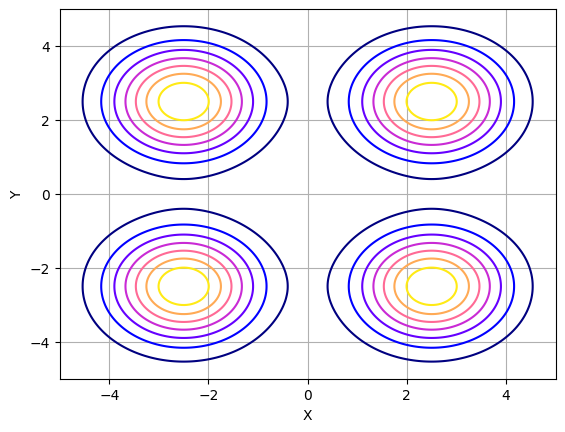

In [80]:
# plot fn(x,y) - note x and y are not independent because there is no way to factorize fn(x,y) into the product of two PDFs f1(x)*f2(y)

x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x, y)
Z = fn(X, Y, mu=1, sigma=1)
Z = Z.reshape(X.shape)
plt.contour(X, Y, Zsum, cmap='gnuplot2')
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(True)
plt.show()

In [81]:
# check that function is normalized
from scipy import integrate

# define the limits of integration
x_lower_limit = -np.inf
x_upper_limit = np.inf
y_lower_limit = -np.inf
y_upper_limit = np.inf

# define the function to integrate
def integrand(x, y):
    X, Y = np.meshgrid(x, y)
    return fn(X, Y, mu=1, sigma=1)  # replace with your actual mu and sigma

# perform the double integration
integral, error = integrate.dblquad(integrand, x_lower_limit, x_upper_limit, lambda x: y_lower_limit, lambda x: y_upper_limit)

print(f"The integral of the function over the entire space is approximately {integral:.6f}")

The integral of the function over the entire space is approximately 1.000000


In [82]:
# now compute statistical metrics for the 2D PDF

# integrate for the means
def integrand_mean_x(x, y):
    X, Y = np.meshgrid(x, y)
    return x * fn(X, Y, mu=1, sigma=1)  

def integrand_mean_y(x, y):
    X, Y = np.meshgrid(x, y)
    return y * fn(X, Y, mu=1, sigma=1)  


mean_x, error = integrate.dblquad(integrand_mean_x, x_lower_limit, x_upper_limit, lambda x: y_lower_limit, lambda x: y_upper_limit)
mean_y, error = integrate.dblquad(integrand_mean_y, x_lower_limit, x_upper_limit, lambda x: y_lower_limit, lambda x: y_upper_limit)

# integrate for the variances
def integrand_var_x(x, y):
    X, Y = np.meshgrid(x, y)
    return (x - mean_x)**2 * fn(X, Y, mu=1, sigma=1)  

def integrand_var_y(x, y):
    X, Y = np.meshgrid(x, y)
    return (y - mean_y)**2 * fn(X, Y, mu=1, sigma=1)  

var_x, error = integrate.dblquad(integrand_var_x, x_lower_limit, x_upper_limit, lambda x: y_lower_limit, lambda x: y_upper_limit)
var_y, error = integrate.dblquad(integrand_var_y, x_lower_limit, x_upper_limit, lambda x: y_lower_limit, lambda x: y_upper_limit)

print(f"The mean is approximately (x,y)=({mean_x:.6f},{mean_y:.6f})")
print(f"The variance of x is approximately {var_x:.6f}")
print(f"The variance of y is approximately {var_y:.6f}")


The mean is approximately (x,y)=(0.000000,0.000000)
The variance of x is approximately 1.500000
The variance of y is approximately 1.500000


In [83]:
# now compute the covariance to show there is no correlation between x and y
def integrand_cov(x, y):
    X, Y = np.meshgrid(x, y)
    return (x - mean_x) * (y - mean_y) * fn(X, Y, mu=1, sigma=1)

cov_xy, error = integrate.dblquad(integrand_cov, x_lower_limit, x_upper_limit, lambda x: y_lower_limit, lambda x: y_upper_limit)
print(f"The covariance of x and y is approximately sigma_xy = {cov_xy:.6f}")

The covariance of x and y is approximately sigma_xy = 0.000000


##### Despite x and y being dependent, the covariance is zero. Dependent variables can thus be uncorrelated. In practice, this happens rarely so generally it's safe to assume that dependent variables will show correlation.